In [14]:
# !wget https://raw.githubusercontent.com/airctic/icevision/master/install_colab.sh
# !bash install_colab.sh

In [15]:
# from icevision.all import *

# Making model

In [16]:
# Make sure the selection is the same as your training 

selection = 2 # !!! Zero will lead to error in signle image inference  
num_classes = 91 # manually select number of classes (91 for full coco) 
image_size = 384
extra_args = {}

if selection == 0:
  model_type = models.mmdet.retinanet
  backbone = model_type.backbones.resnet50_fpn_1x

elif selection == 1:
  # The Retinanet model is also implemented in the torchvision library
  model_type = models.torchvision.retinanet
  backbone = model_type.backbones.resnet50_fpn

elif selection == 2:
  model_type = models.ross.efficientdet
  backbone = model_type.backbones.tf_lite0
  # The efficientdet model requires an img_size parameter
  extra_args['img_size'] = image_size

elif selection == 3:
  model_type = models.ultralytics.yolov5
  backbone = model_type.backbones.small
  # The yolov5 model requires an img_size parameter
  extra_args['img_size'] = image_size

model = model_type.model(backbone=backbone(pretrained=True),num_classes=num_classes, **extra_args)


# Loading model parameters

In [17]:
PATH = 'model1.mm'
model.load_state_dict(torch.load(PATH))
model.eval()
print('Done!')

Done!


# Select image from a folder

In [18]:
# load all images from folder for preview
dataset_dir = './coco-2017-set1'
import cv2 
import os 
import glob 
img_dir = "" # Enter Directory of all images  
data_path = dataset_dir + '/train/data' + '/*'

files = glob.glob(data_path) 
imgs = [] 
imgs_path = []
for f1 in files: 
    img = PIL.Image.open(f1)
    imgs.append(img) 
    imgs_path.append(f1)


./coco-2017-set1/train/data/000000054411.jpg


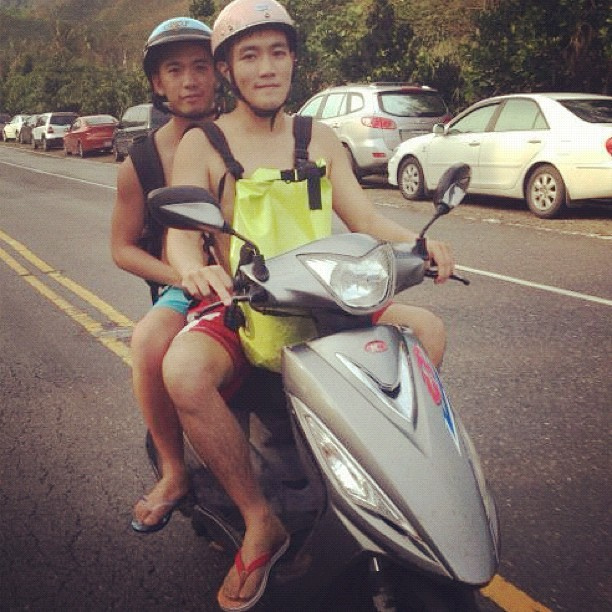

In [19]:
# preview one image
# image_id = 80
image_id = 92
print(imgs_path[image_id])
img = imgs[image_id]
img


# select image form file

In [ ]:
# from PIL import Image
# import requests

# url = r'https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.youtube.com%2Fwatch%3Fv%3D8hEXptpqTVo&psig=AOvVaw3pmZ4qiMz1hwmu0ewrg7eZ&ust=1626581441304000&source=images&cd=vfe&ved=2ahUKEwiH8KmZnunxAhWngGMGHYorB38QjRx6BAgAEA8'
# img = Image.open(requests.get(url, stream=True).raw)    
# img  

# img = Image.open('./coco-2017-set1/train/data/000000001799.jpg')
# img

# Prediction

[3, 3, 1, 4]
[<BBox (xmin:243.573974609375, ymin:54.39793395996094, xmax:384.0, ymax:133.97581481933594)>, <BBox (xmin:180.71852111816406, ymin:48.387908935546875, xmax:281.8009948730469, ymax:115.95906066894531)>, <BBox (xmin:83.28148651123047, ymin:0.0, xmax:282.5742492675781, ymax:376.8463439941406)>, <BBox (xmin:84.03278350830078, ymin:67.55911254882812, xmax:316.2070617675781, ymax:384.0)>]
[    0.80422     0.75307     0.54754      0.5094]


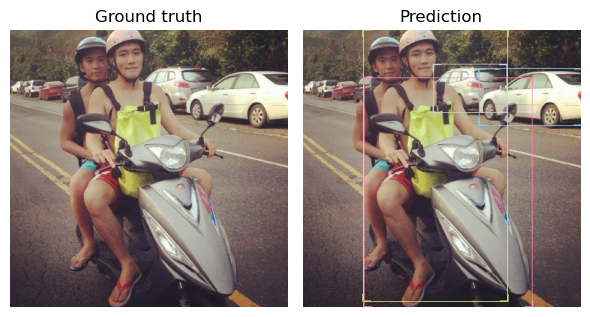

In [21]:
# Inference. Shows scores, labels and bounding boxes.
infer_tfms = tfms.A.Adapter([*tfms.A.resize_and_pad(size=384), tfms.A.Normalize()])
infer_ds = Dataset.from_images([img], infer_tfms)

preds = model_type.predict(model, infer_ds, keep_images=True)
for x in preds[0].pred.detection.components:
    if 'ScoresRecordComponent' in str(x):
        scores = x.scores
        print(scores)
    if 'InstancesLabelsRecordComponent' in str(x):
        labels = x.label_ids
        print(labels)
    if 'BBoxesRecordComponen' in str(x):
        bboxes = x.bboxes
        print(bboxes)
        
show_preds(preds=preds[0:1])